# Import packages

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

# Analysis

In [11]:
co_pref = pd.read_csv(
    "/Users/nursenkaradayi/Downloads/co-preference-edges.txt",  
    sep="\t",                   
    header=None,                
    names=["start_node", "end_node"]  
)

co_pref.head()

start_node                            end_node
0  Acil Durum ve Afet Yönetimi                  İlk ve Acil Yardım
1  Acil Durum ve Afet Yönetimi      Sağlık Kurumları İşletmeciliği
2  Acil Durum ve Afet Yönetimi                    Sosyal Hizmetler
3  Acil Durum ve Afet Yönetimi             İş Sağlığı ve Güvenliği
4  Acil Durum ve Afet Yönetimi  Tıbbi Dokümantasyon ve Sekreterlik

In [13]:
G = nx.from_pandas_edgelist(co_pref, "start_node", "end_node")

print("Düğüm sayısı:", G.number_of_nodes())
print("Kenar sayısı:", G.number_of_edges())

Düğüm sayısı: 622
Kenar sayısı: 5620


# Visualizing the graph

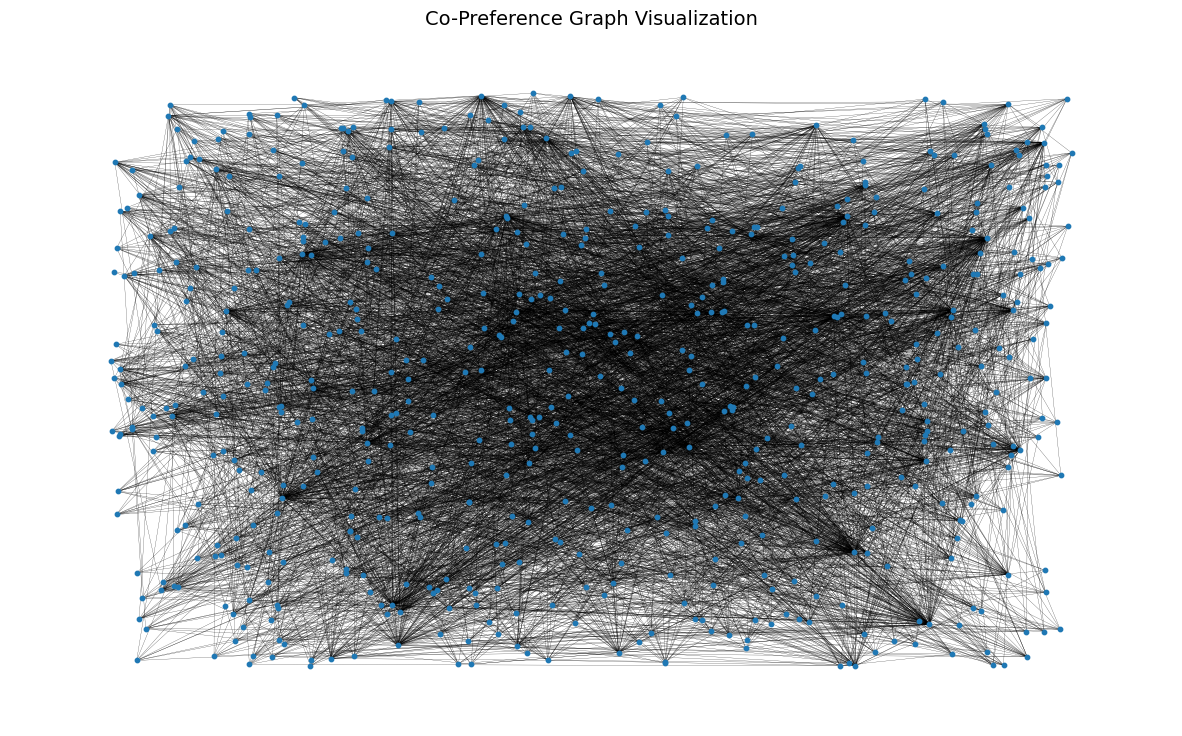

In [14]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")

plot_options = {
    "node_size": 10,
    "with_labels": False,
    "width": 0.15
}

nx.draw_networkx(
    G,
    pos=nx.random_layout(G),
    ax=ax,
    **plot_options
)
plt.title("Co-Preference Graph Visualization", fontsize=14)
plt.show()

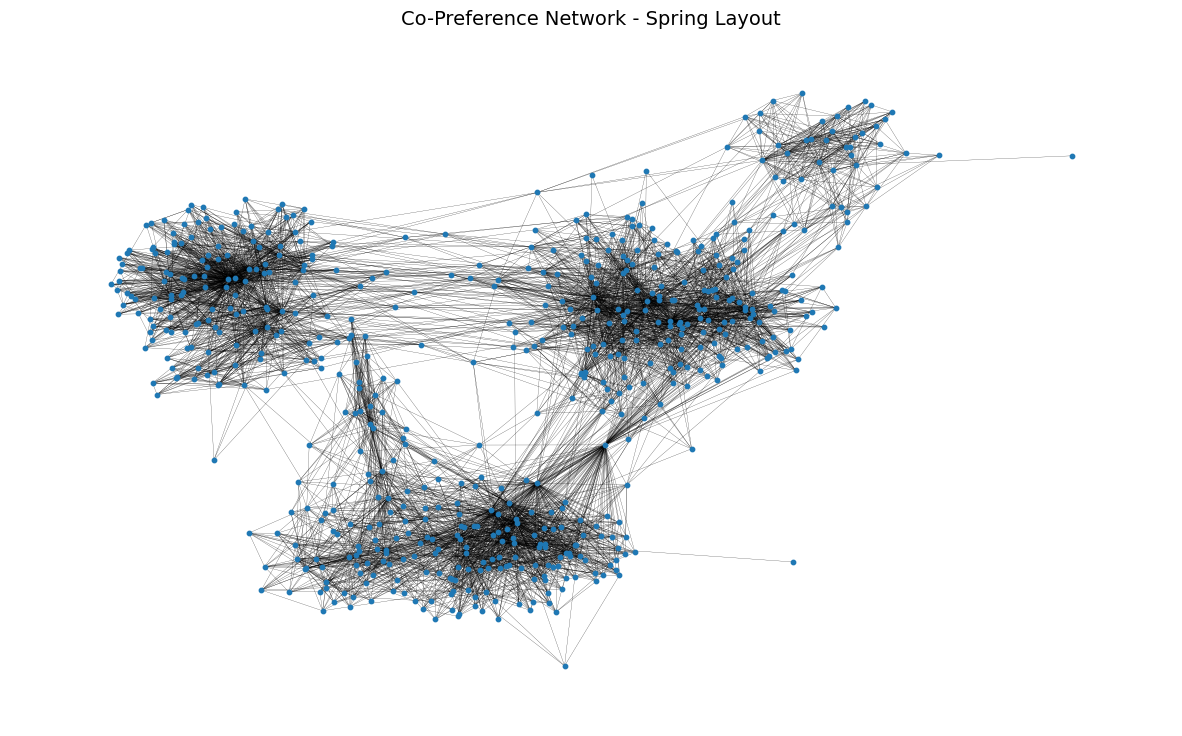

In [15]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {
    "node_size": 10,
    "with_labels": False,
    "width": 0.15
}

nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

plt.title("Co-Preference Network - Spring Layout", fontsize=14)
plt.show()

# Basic topological attributes 

In [16]:
G.number_of_nodes()


622

In [17]:
G.number_of_edges()

5620

In [18]:
average_degree = np.mean([d for _, d in G.degree()])
print("Ortalama derece:", average_degree)

Ortalama derece: 18.070739549839228


In [23]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [25]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
print("Grafın çapı (diameter):", diameter)

Grafın çapı (diameter): 6


In [27]:
average_path_lengths = [
    np.mean(list(spl.values()))
    for spl in shortest_path_lengths.values()
]

overall_average_path_length = np.mean(average_path_lengths)
print("Ortalama en kısa yol uzunluğu:", overall_average_path_length)

Ortalama en kısa yol uzunluğu: 3.0142988596064972


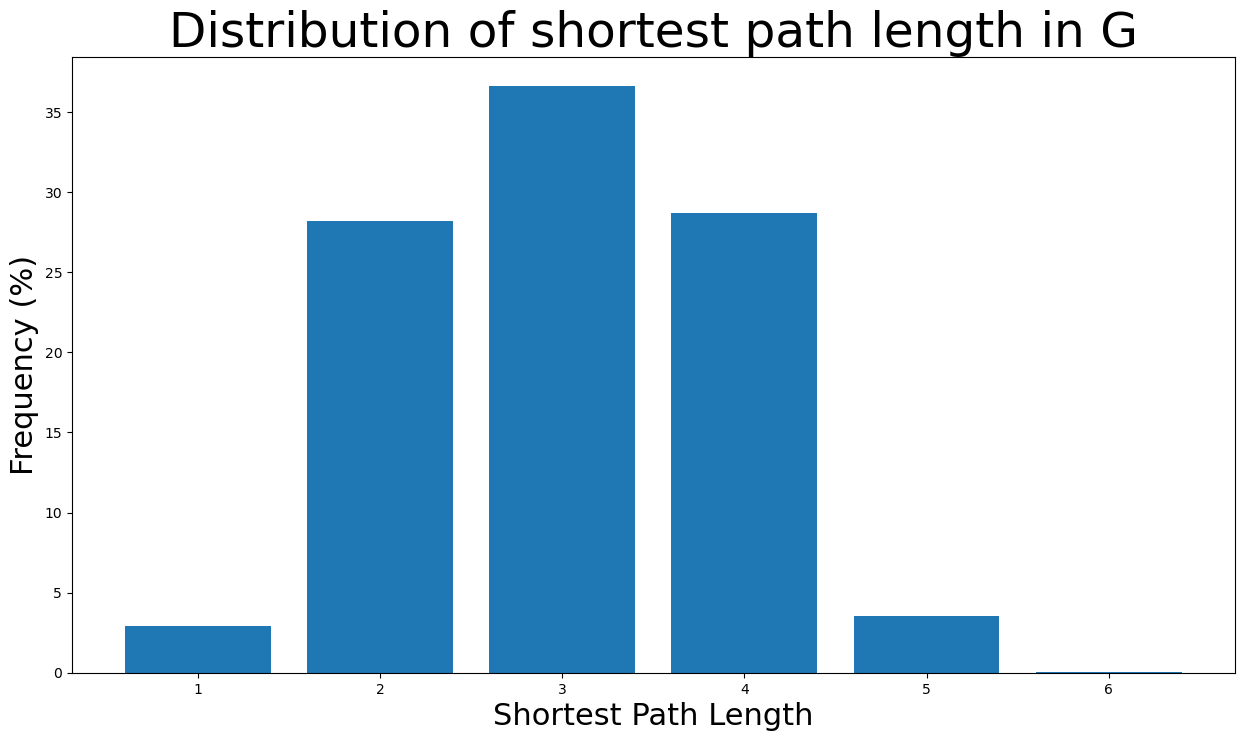

In [28]:
path_lengths = np.zeros(diameter + 1, dtype=int)

for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)

ax.set_title("Distribution of shortest path length in G", fontdict={"size": 35}, loc="center")
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

plt.show()

In [29]:
nx.density(G)

0.029099419564958498

In [30]:
nx.number_connected_components(G)

1

# Centrality measures

In [31]:
degree_centrality = nx.degree_centrality(G)

top_8_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:8]

print("En yüksek degree centrality değerine sahip düğümler:")
for node, centrality in top_8_degree:
    print(f"Düğüm: {node}, Centrality: {centrality:.4f}")

En yüksek degree centrality değerine sahip düğümler:
Düğüm: Halkla İlişkiler ve Tanıtım, Centrality: 0.1981
Düğüm: Okul Öncesi Öğretmenliği, Centrality: 0.1868
Düğüm: Bilgisayar Mühendisliği, Centrality: 0.1852
Düğüm: İşletme, Centrality: 0.1852
Düğüm: Hemşirelik, Centrality: 0.1771
Düğüm: Bankacılık ve Sigortacılık, Centrality: 0.1771
Düğüm: Elektrik-Elektronik Mühendisliği, Centrality: 0.1659
Düğüm: Çocuk Gelişimi, Centrality: 0.1643


In [32]:
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[('Halkla İlişkiler ve Tanıtım', 123),
 ('Okul Öncesi Öğretmenliği', 116),
 ('Bilgisayar Mühendisliği', 115),
 ('İşletme', 115),
 ('Hemşirelik', 110),
 ('Bankacılık ve Sigortacılık', 110),
 ('Elektrik-Elektronik Mühendisliği', 103),
 ('Çocuk Gelişimi', 102)]

Text(0, 0.5, 'Counts')

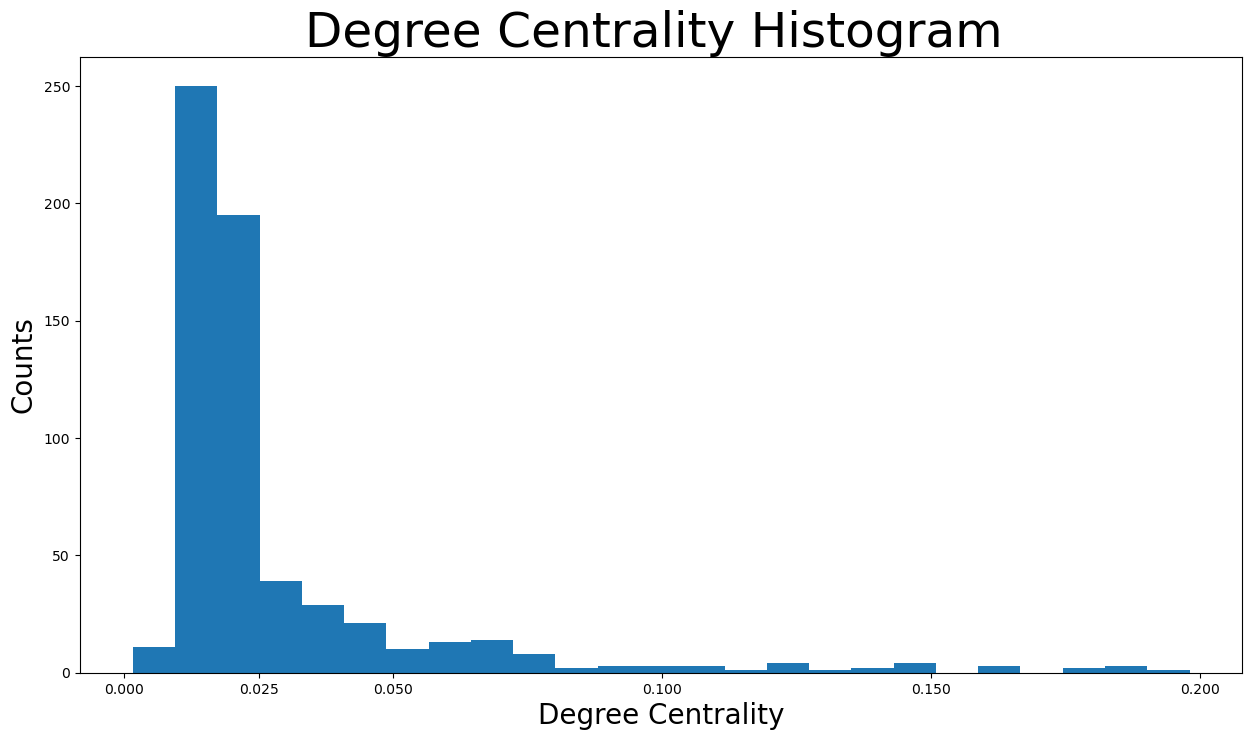

In [33]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.8240228116512298,
 1.1733234345912933,
 -0.8626148456335068,
 0.8223018401861191)

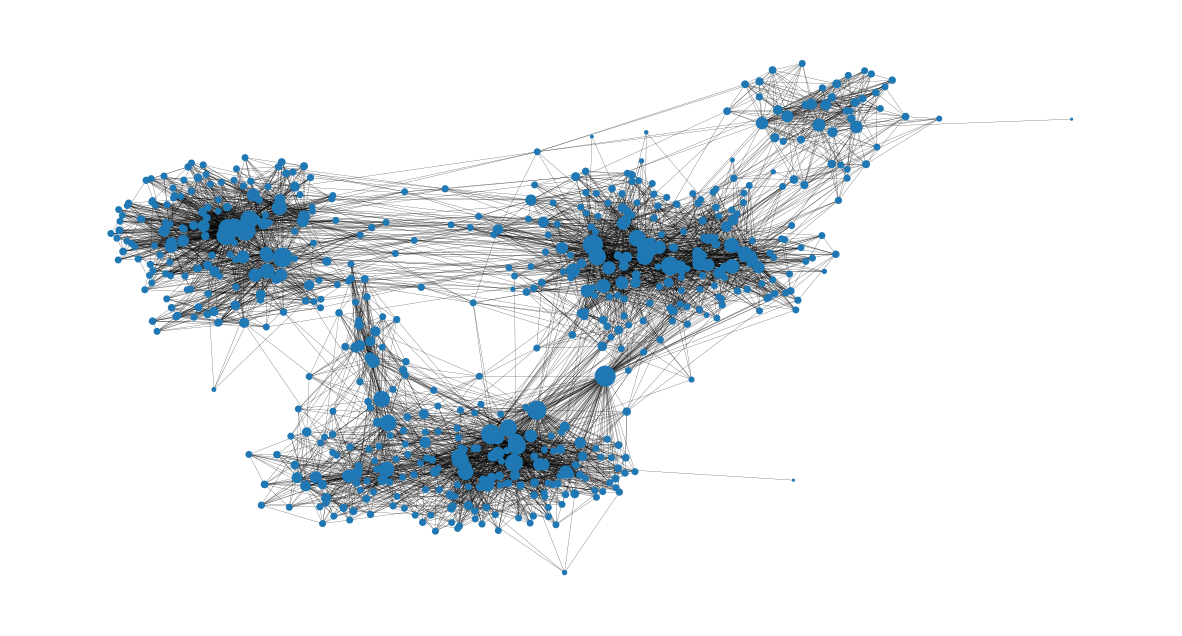

In [34]:
node_size = [
    v * 1000 for v in degree_centrality.values()
] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Betweenness Centrality

In [35]:
betweenness_centrality = nx.betweenness_centrality(G)

top_8_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:8]

print("En yüksek betweenness centrality değerine sahip düğümler:")
for node, centrality in top_8_betweenness:
    print(f"Düğüm: {node}, Betweenness: {centrality:.4f}")

En yüksek betweenness centrality değerine sahip düğümler:
Düğüm: Hemşirelik, Betweenness: 0.1471
Düğüm: İş Sağlığı ve Güvenliği, Betweenness: 0.1107
Düğüm: Halkla İlişkiler ve Tanıtım, Betweenness: 0.1078
Düğüm: Okul Öncesi Öğretmenliği, Betweenness: 0.0994
Düğüm: İlahiyat, Betweenness: 0.0887
Düğüm: Çocuk Gelişimi, Betweenness: 0.0819
Düğüm: Bankacılık ve Sigortacılık, Betweenness: 0.0668
Düğüm: İşletme, Betweenness: 0.0564


Text(0, 0.5, 'Counts')

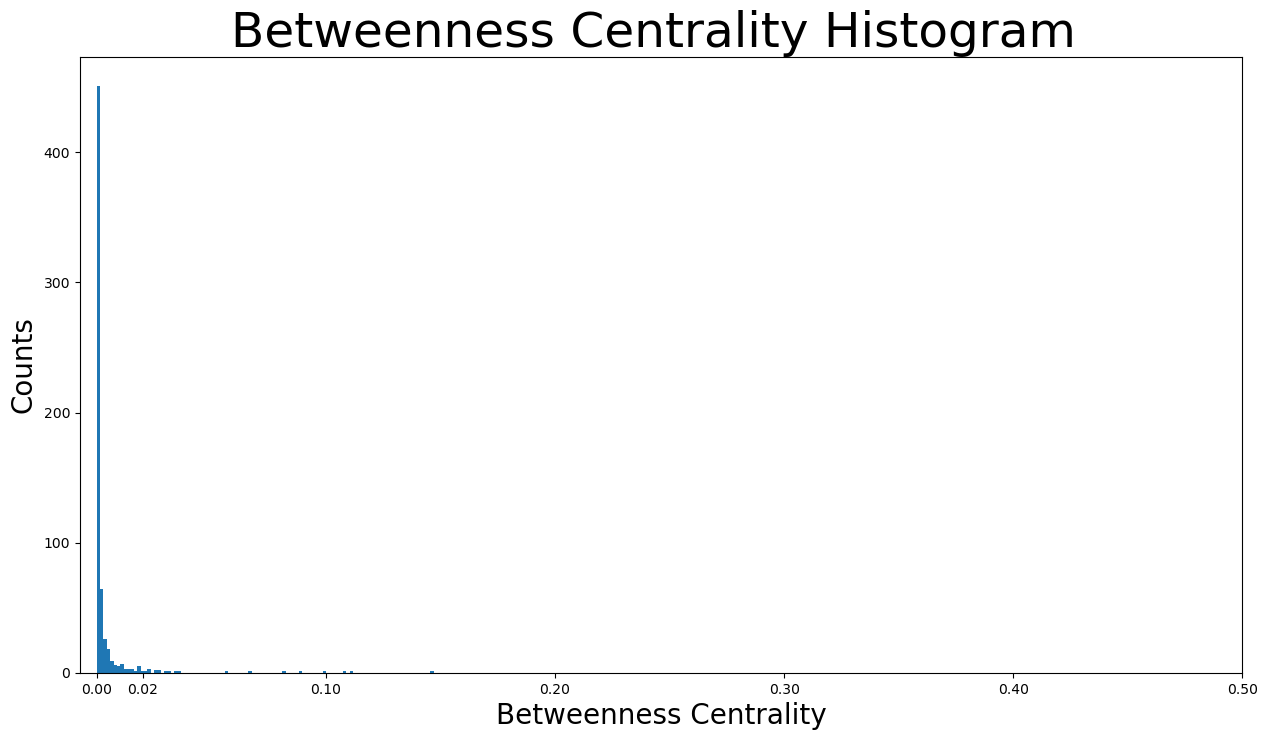

In [36]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.8240228116512298,
 1.1733234345912933,
 -0.8626148456335068,
 0.8223018401861191)

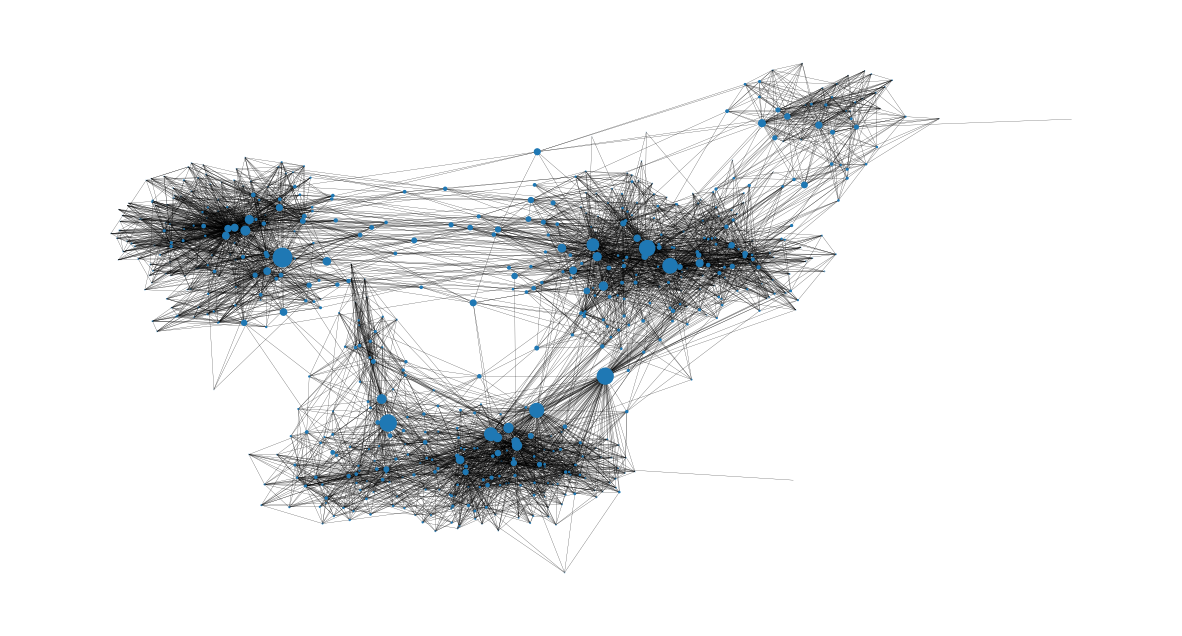

In [37]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Closeness Centrality

In [38]:
closeness_centrality = nx.centrality.closeness_centrality(
    G
)  
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[('Okul Öncesi Öğretmenliği', 0.4617100371747212),
 ('İlahiyat', 0.45594713656387664),
 ('Çocuk Gelişimi', 0.4394904458598726),
 ('Sınıf Öğretmenliği', 0.43487394957983194),
 ('Halkla İlişkiler ve Tanıtım', 0.4270976616231087),
 ('Hemşirelik', 0.426510989010989),
 ('Bankacılık ve Sigortacılık', 0.42621825669183255),
 ('Adalet', 0.4244702665755297)]

In [45]:
closeness_centrality = nx.closeness_centrality(G)

node_id = list(closeness_centrality.keys())[0]  
print( 1 / closeness_centrality[node_id])

2.8502415458937196


Text(0, 0.5, 'Counts')

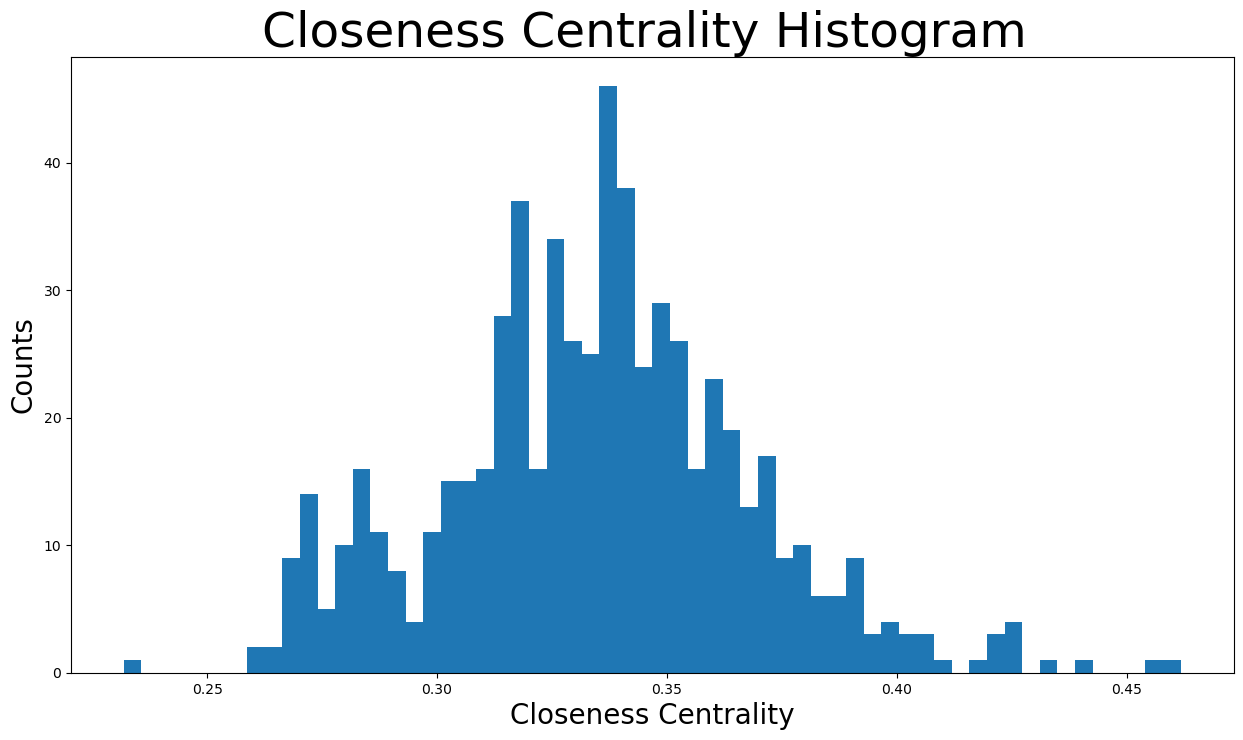

In [46]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.8240228116512298,
 1.1733234345912933,
 -0.8626148456335068,
 0.8223018401861191)

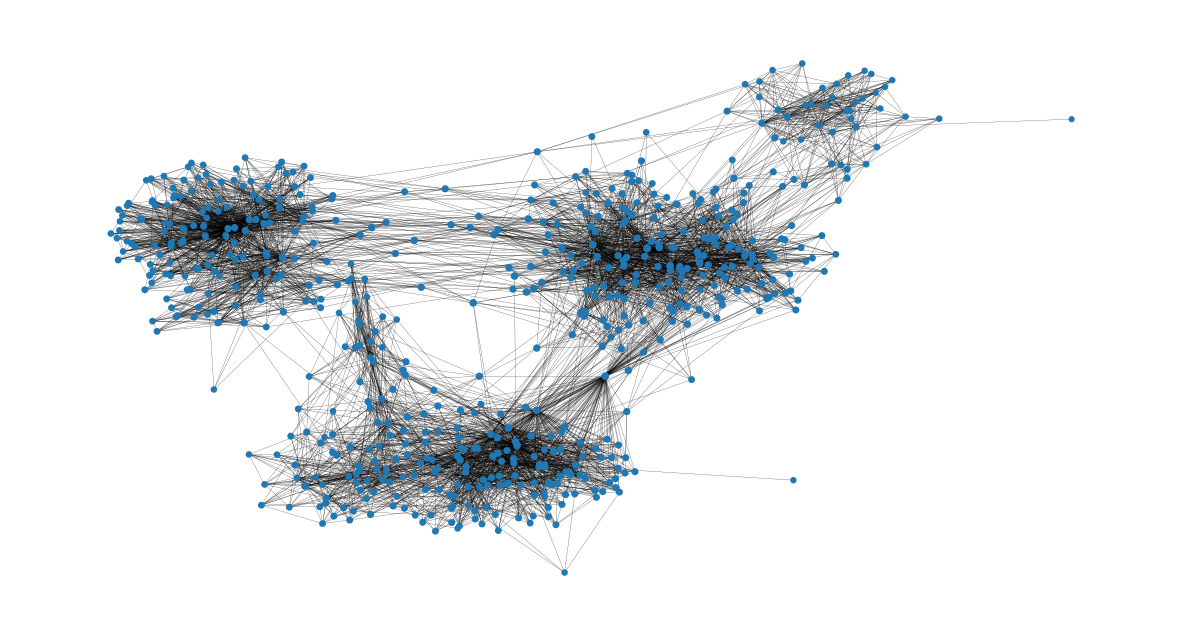

In [48]:
node_size = [
    v * 50 for v in closeness_centrality.values()
]  
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")


# Eigenvector Centrality

In [50]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

top_10_eigen = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

print("En yüksek eigenvector centrality değerine sahip düğümler:")
for node, value in top_10_eigen:
    print(f"Düğüm: {node}, Eigenvector Centrality: {value:.5f}")

En yüksek eigenvector centrality değerine sahip düğümler:
Düğüm: Bilgisayar Mühendisliği, Eigenvector Centrality: 0.20219
Düğüm: Elektrik-Elektronik Mühendisliği, Eigenvector Centrality: 0.18577
Düğüm: Hemşirelik, Eigenvector Centrality: 0.17895
Düğüm: Makine Mühendisliği, Eigenvector Centrality: 0.17652
Düğüm: İnşaat Mühendisliği, Eigenvector Centrality: 0.17243
Düğüm: Endüstri Mühendisliği, Eigenvector Centrality: 0.16555
Düğüm: Halkla İlişkiler ve Tanıtım, Eigenvector Centrality: 0.15700
Düğüm: Çocuk Gelişimi, Eigenvector Centrality: 0.13700
Düğüm: Bankacılık ve Sigortacılık, Eigenvector Centrality: 0.13327
Düğüm: Okul Öncesi Öğretmenliği, Eigenvector Centrality: 0.13192


In [53]:
top_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[1:10]
top_betweenness_nodes = [node for node, _ in top_betweenness]

neighbors_3000 = list(G.neighbors(3000)) if 3000 in G else []
result = all(item in neighbors_3000 for item in top_betweenness_nodes)
print("2-10 arası yüksek betweenness centrality düğümleri 3000'in komşusu mu?", result)

2-10 arası yüksek betweenness centrality düğümleri 3000'in komşusu mu? False


Text(0, 0.5, 'Counts')

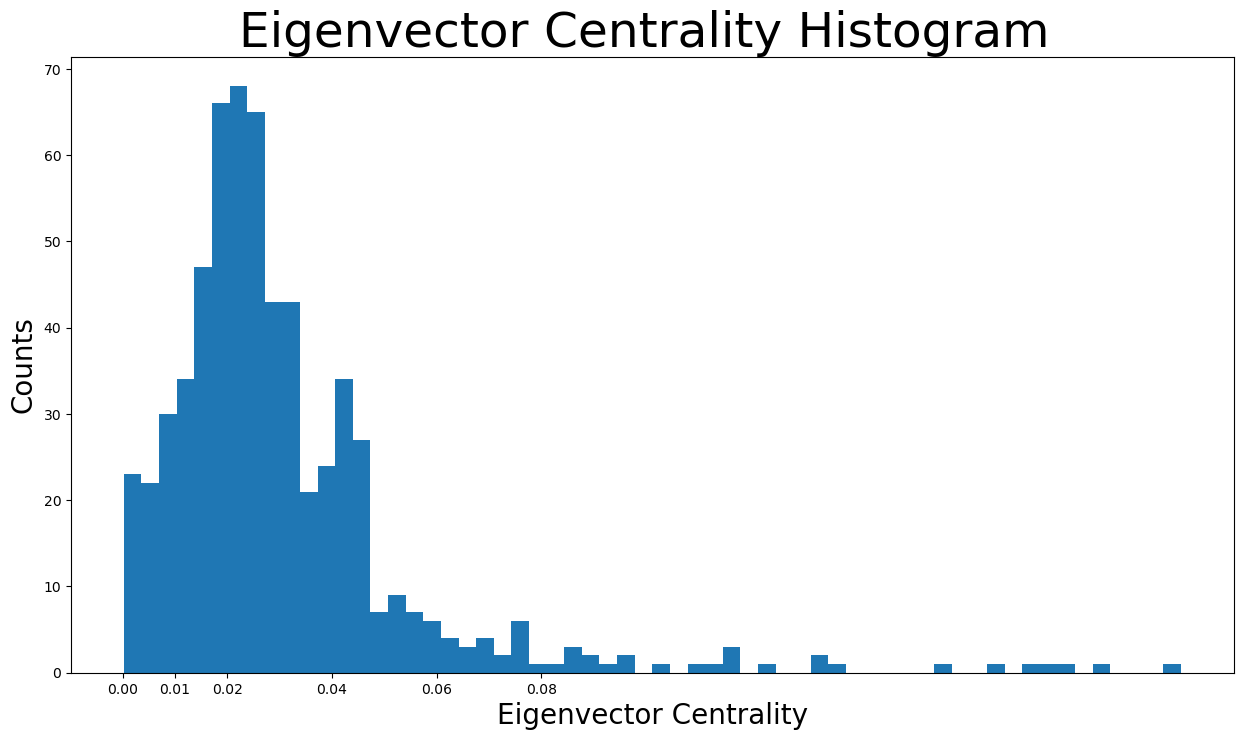

In [54]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.8240228116512298,
 1.1733234345912933,
 -0.8626148456335068,
 0.8223018401861191)

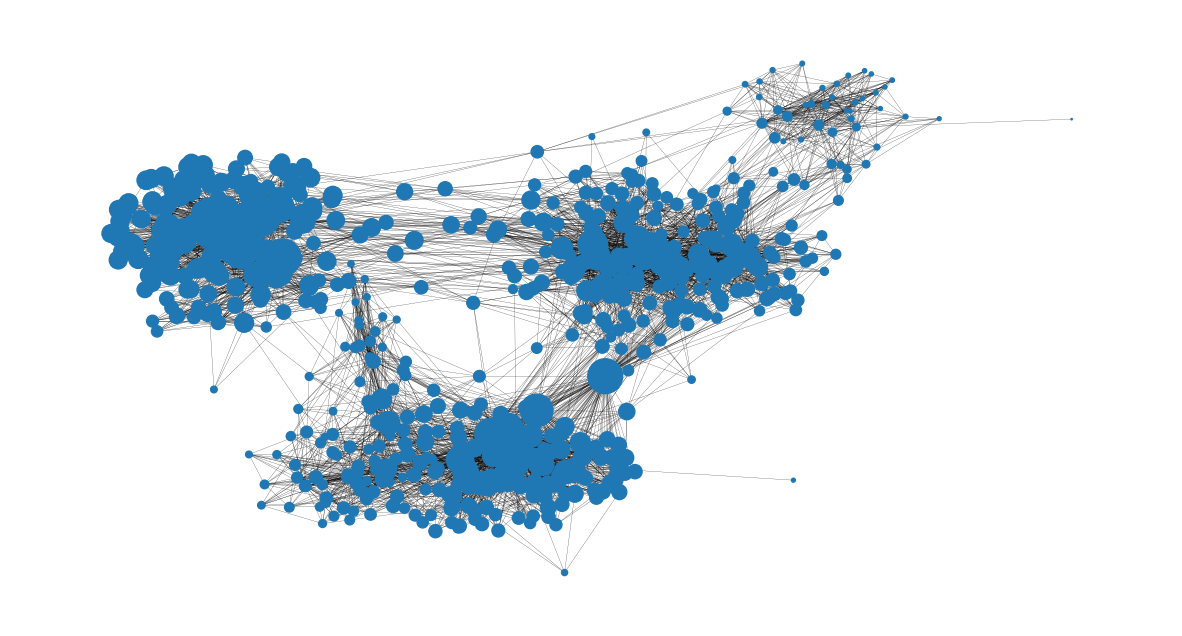

In [55]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

# Clustering Effects

In [56]:
nx.average_clustering(G)

0.542676167015539

Text(0, 0.5, 'Counts')

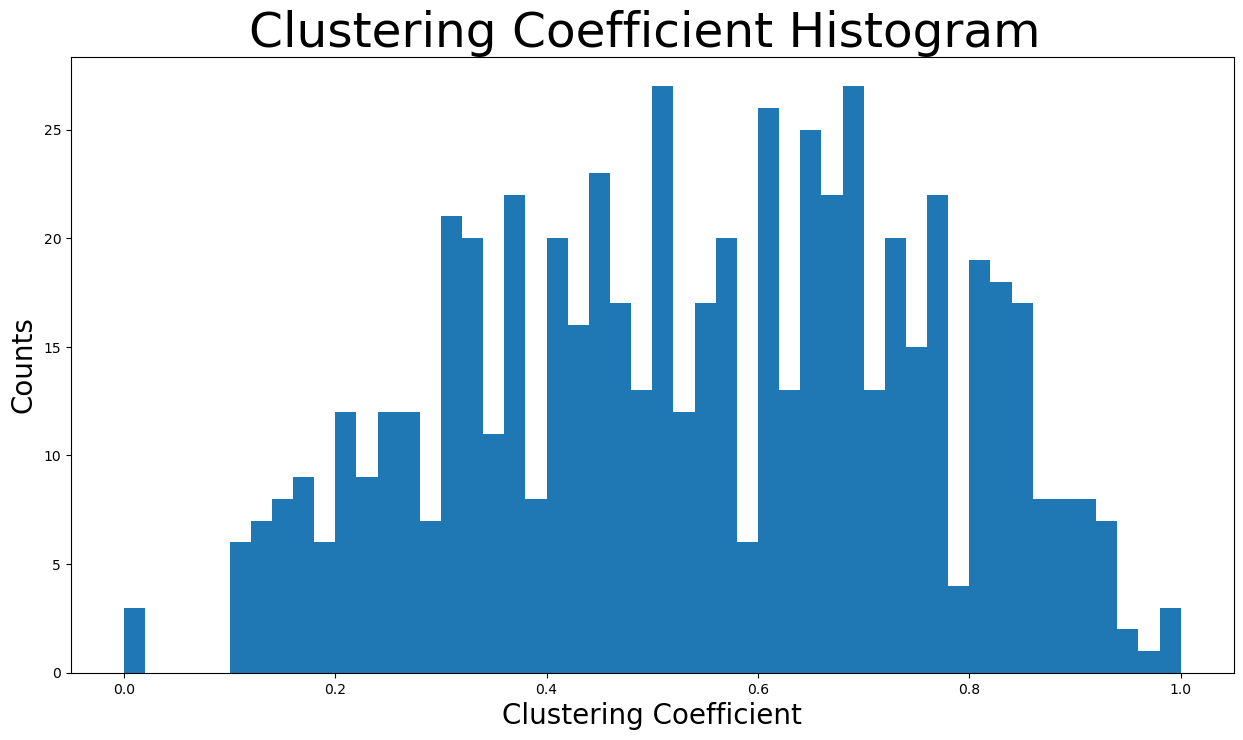

In [57]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [58]:
triangles_per_node = list(nx.triangles(G).values())
sum(
    triangles_per_node
) / 3 

16343.0

In [59]:
np.mean(triangles_per_node)

78.82475884244373

In [61]:
np.median(triangles_per_node)

38.0

# Bridges

In [62]:
nx.has_bridges(G)

True

In [63]:
bridges = list(nx.bridges(G))
len(bridges)

2

In [64]:
local_bridges = list(nx.local_bridges(G, with_span=False))
len(local_bridges)

63

(-0.8240228116512298,
 1.1733234345912933,
 -0.8626148456335068,
 0.8223018401861191)

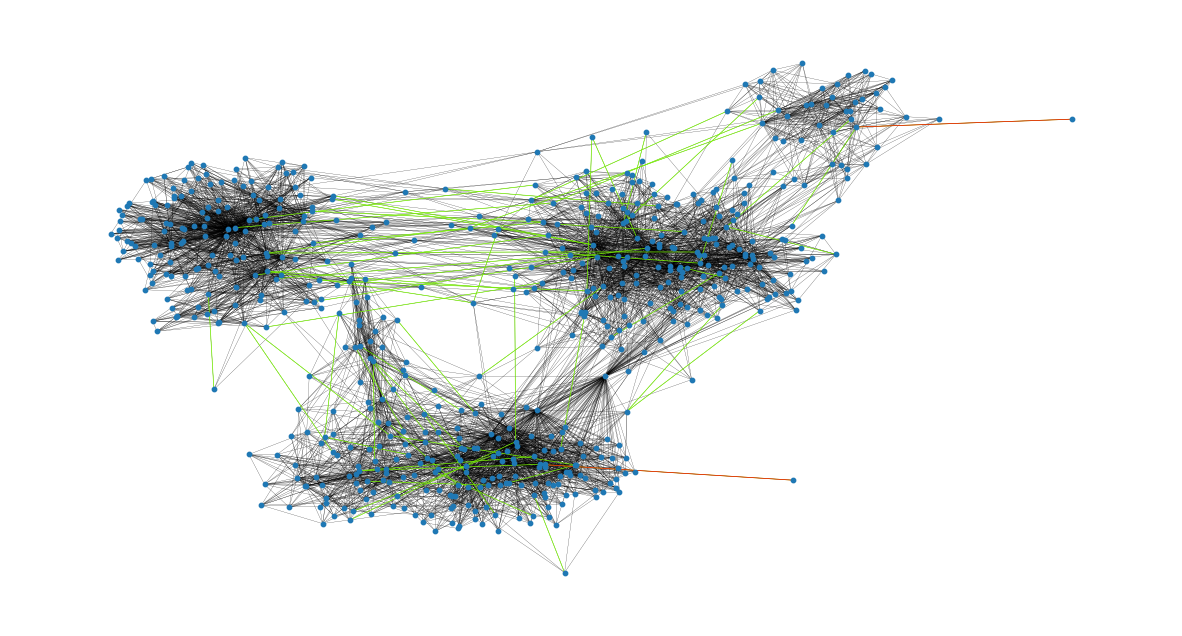

In [65]:
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(
    G, pos, edgelist=local_bridges, width=0.5, edge_color="lawngreen"
)  
nx.draw_networkx_edges(
    G, pos, edgelist=bridges, width=0.5, edge_color="r"
) 
plt.axis("off")

# Assortativity

In [66]:
nx.degree_assortativity_coefficient(G)

-0.29546042552257457

In [67]:
nx.degree_pearson_correlation_coefficient(
    G
)

-0.2954604255225768

# Network Communities

In [72]:
colors = {}
counter = 0

for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)
    counter += 1
    for node in com:
        colors[node] = color
counter

5

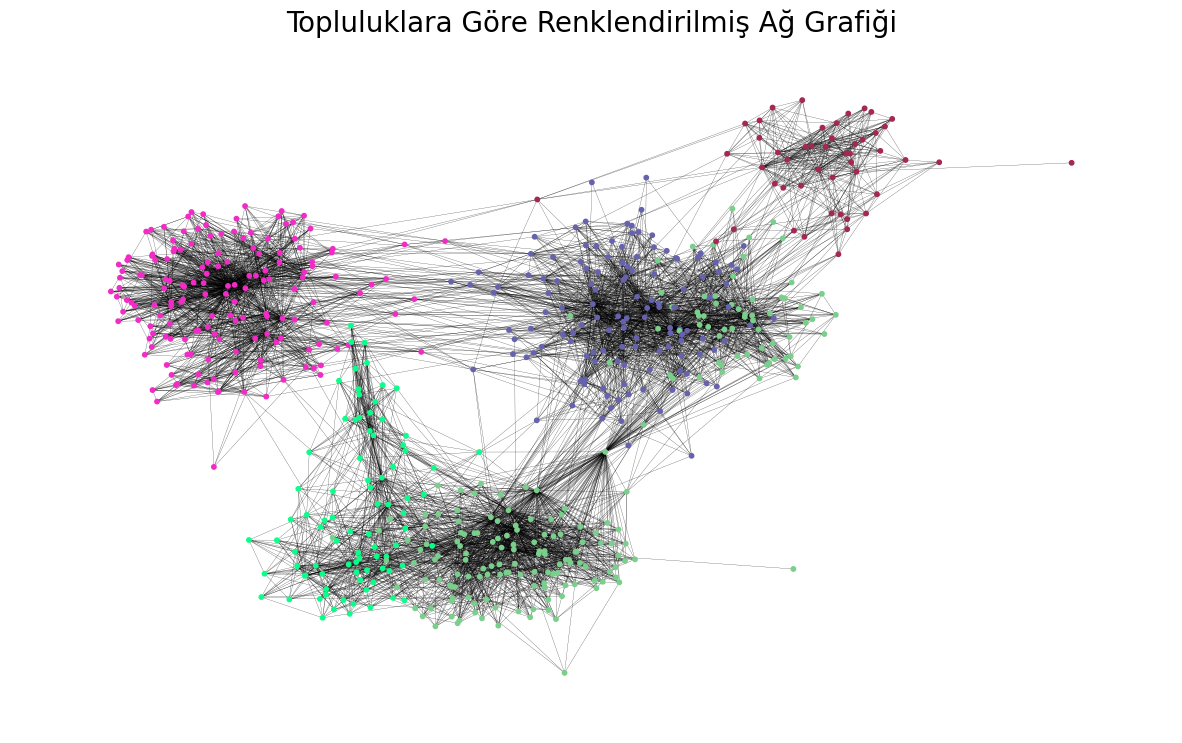

In [74]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G,
    pos=pos,
    node_size=10,
    with_labels=False,
    width=0.15,
    node_color=[colors[n] for n in G.nodes()]  # dict yerine sıra bazlı liste veriyoruz
)
plt.title("Topluluklara Göre Renklendirilmiş Ağ Grafiği", fontsize=20)
plt.show()

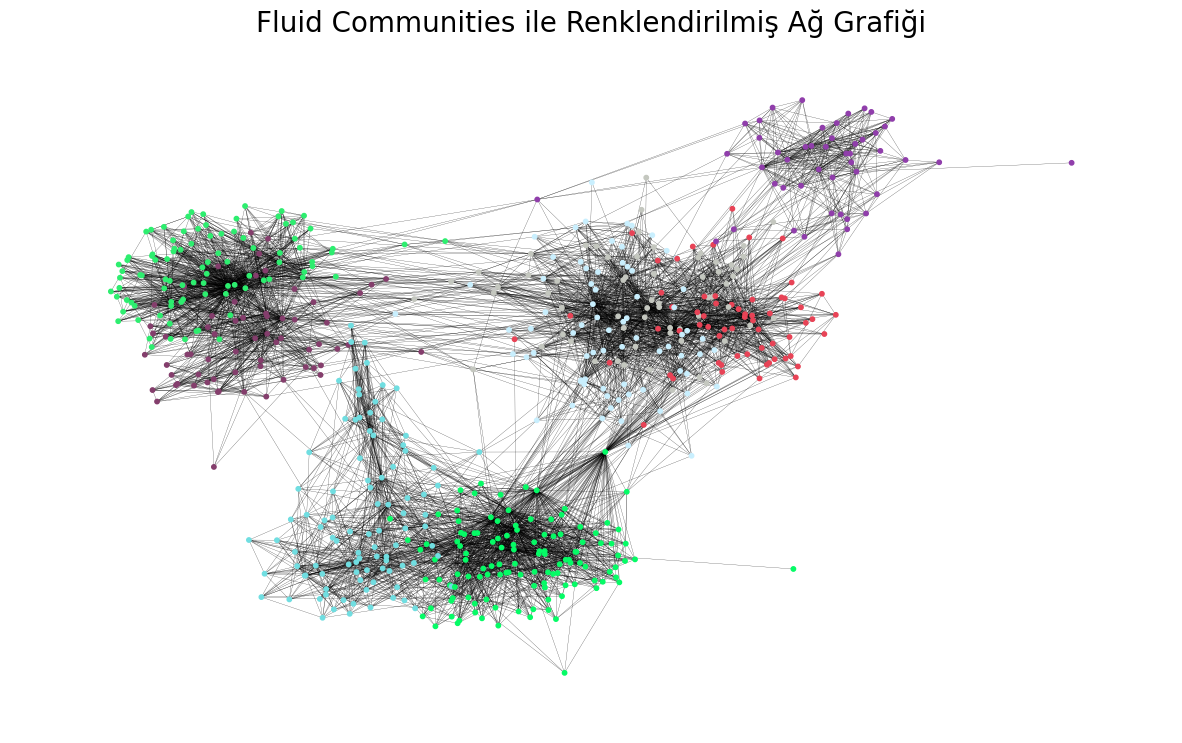

In [76]:
colors = {}  # Her düğüm için renk tutacak bir sözlük

for com in nx.community.asyn_fluidc(G, 8, seed=0):  # 8 topluluk istiyoruz
    color = "#%06X" % randint(0, 0xFFFFFF)  # Rastgele renk üret
    for node in com:
        colors[node] = color  # Düğümün topluluğuna göre rengini ata
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G,
    pos=pos,
    node_size=10,
    with_labels=False,
    width=0.15,
    node_color=[colors[n] for n in G.nodes()]  # dict’ten sıralı listeye
)
plt.title("Fluid Communities ile Renklendirilmiş Ağ Grafiği", fontsize=20)
plt.show()

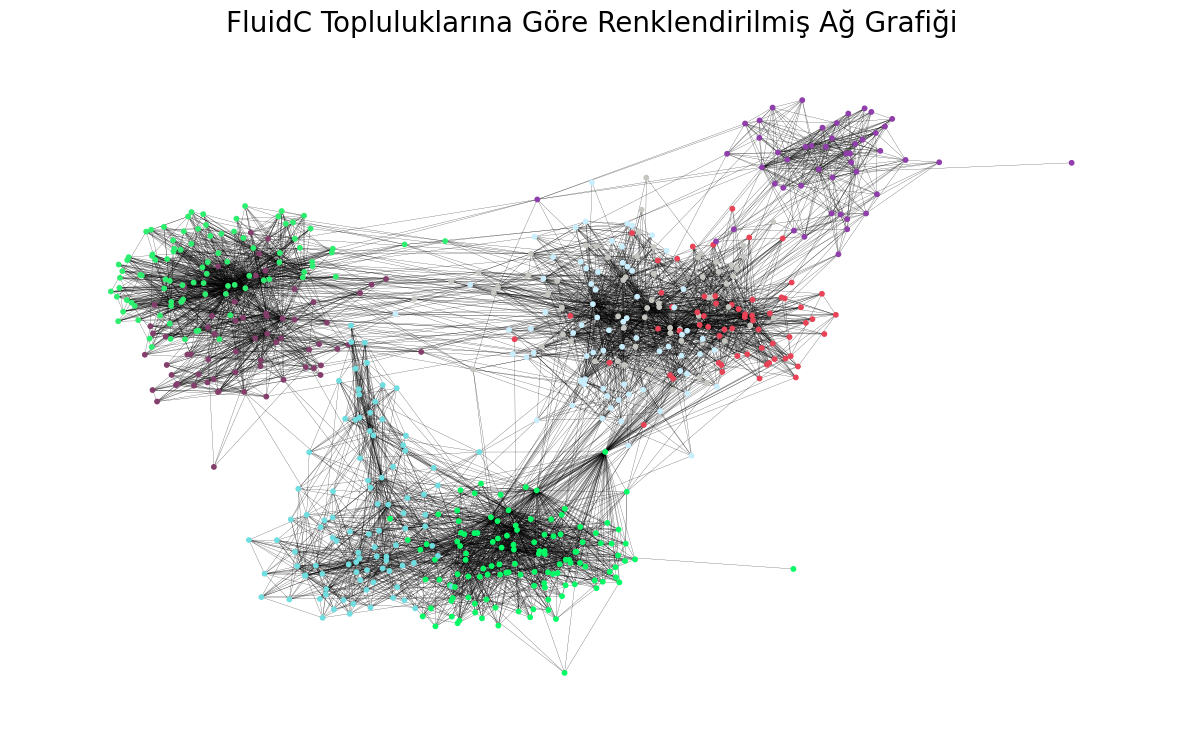

In [77]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G,
    pos=pos,
    node_size=10,
    with_labels=False,
    width=0.15,
    node_color=[colors[n] for n in G.nodes()]  # her düğüm için rengi sıraya göre al
)
plt.title("FluidC Topluluklarına Göre Renklendirilmiş Ağ Grafiği", fontsize=20)
plt.show()